In [2]:
import lsdb
from lsdb.catalog.association_catalog.association_catalog import AssociationCatalog
from lsdb.dask.join_catalog_data import join_catalog_data

from dask.distributed import Client

In [3]:
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 96,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44699,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: Just now,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:46494,Total threads: 24
Dashboard: http://127.0.0.1:45083/status,Memory: 251.90 GiB
Nanny: tcp://127.0.0.1:45860,


In [19]:
a_cat = lsdb.read_hipscat("/astro/users/seanmcgu/ztf_apr_13/ztf_object_to_source/", catalog_type=AssociationCatalog)
a_cat

,primary_id,join_id,join_hipscat_index
npartitions=96,,,
,int64,int64,uint64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [5]:
object_cat = lsdb.read_hipscat("/astro/users/seanmcgu/ztf_apr_13/ztf_dr14")
object_cat.compute()

,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,
9745676850465603584,71180673097035613,67.309784,-30.678856,-999.000000,20.332701,20.507700,0,1,0,NaN,20.618536,NaN,0,0,8
9745677245711646720,71190672942652378,67.294304,-30.673319,16.343000,15.784000,15.767100,0,19,0,NaN,15.913904,NaN,0,0,8
9745677256960770048,71190672963933154,67.296425,-30.672634,18.017000,17.486000,17.558001,0,19,0,NaN,17.770075,NaN,0,0,8
9745677277470916608,71190672904066471,67.290398,-30.669733,-999.000000,20.306101,19.881599,0,2,0,NaN,20.214223,NaN,0,0,8
9745677324333875200,71190672764002148,67.276428,-30.673445,-999.000000,-999.000000,20.925699,0,1,0,NaN,19.957642,NaN,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799832711060258816,84610674925258226,67.492569,-19.485220,-999.000000,21.147200,20.700001,15,58,0,21.193711,20.632145,NaN,0,0,8
9799832711060258817,84610674926367845,67.492569,-19.485220,21.647301,21.445200,20.927000,15,58,0,21.193711,20.632145,NaN,0,0,8
9799832720505831424,84610675003571627,67.500383,-19.490579,21.727699,21.195400,20.911800,6,57,0,20.820186,20.701326,NaN,0,0,8


In [16]:
source_cat = lsdb.read_hipscat("/astro/users/seanmcgu/ztf_apr_13/ztf_source/")
source_cat

,index,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,catflags,fieldID,mag,magerr,mjd,rcID,band,Norder,Dir,Npix
npartitions=96,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int16,int16,float32,float32,float64,int16,object,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [20]:
joined = object_cat.join(source_cat, through=a_cat, suffixes=("_left", "_right"))
joined

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,mean_mag_r_left,mean_mag_i_left,Norder_left,Dir_left,Npix_left,primary_id,join_id,join_hipscat_index,index_right,ps1_objid_right,ra_right,dec_right,ps1_gMeanPSFMag_right,ps1_rMeanPSFMag_right,ps1_iMeanPSFMag_right,nobs_g_right,nobs_r_right,nobs_i_right,mean_mag_g_right,mean_mag_r_right,mean_mag_i_right,catflags_right,fieldID_right,mag_right,magerr_right,mjd_right,rcID_right,band_right,Norder_right,Dir_right,Npix_right
npartitions=99,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,int64,int64,uint64,int64,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int16,int16,float32,float32,float64,int16,object,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [12]:
joined.compute()

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,...,catflags_right,fieldID_right,mag_right,magerr_right,mjd_right,rcID_right,band_right,Norder_right,Dir_right,Npix_right
9745676850465603584,71180673097035613,67.309784,-30.678856,-999.0000,20.332701,20.5077,0,1,0,NaN,...,0,1248,20.618536,0.186703,59205.25167,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.946716,0.019332,59181.31983,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.844381,0.019082,59181.31936,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.937126,0.019307,59153.36665,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.899614,0.019212,59233.18631,4,r,3,0,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.989315,0.268267,59474.46454,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.717926,0.238937,59501.48519,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.730957,0.240345,59524.36351,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,21.094055,0.256249,59205.28543,1,g,6,30000,34815


In [21]:
matched = object_cat.crossmatch(object_cat, suffixes=("_left", "_right"))
matched

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,mean_mag_r_left,mean_mag_i_left,Norder_left,Dir_left,Npix_left,ps1_objid_right,ra_right,dec_right,ps1_gMeanPSFMag_right,ps1_rMeanPSFMag_right,ps1_iMeanPSFMag_right,nobs_g_right,nobs_r_right,nobs_i_right,mean_mag_g_right,mean_mag_r_right,mean_mag_i_right,Norder_right,Dir_right,Npix_right,_DIST
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
matched.compute()

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,...,nobs_g_right,nobs_r_right,nobs_i_right,mean_mag_g_right,mean_mag_r_right,mean_mag_i_right,Norder_right,Dir_right,Npix_right,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
9745676850465603584,71180673097035613,67.309784,-30.678856,-999.000000,20.332701,20.507700,0,1,0,NaN,...,0,1,0,NaN,20.618536,NaN,0,0,8,0.0
9745677245711646720,71190672942652378,67.294304,-30.673319,16.343000,15.784000,15.767100,0,19,0,NaN,...,0,19,0,NaN,15.913904,NaN,0,0,8,0.0
9745677256960770048,71190672963933154,67.296425,-30.672634,18.017000,17.486000,17.558001,0,19,0,NaN,...,0,19,0,NaN,17.770075,NaN,0,0,8,0.0
9745677277470916608,71190672904066471,67.290398,-30.669733,-999.000000,20.306101,19.881599,0,2,0,NaN,...,0,2,0,NaN,20.214223,NaN,0,0,8,0.0
9745677324333875200,71190672764002148,67.276428,-30.673445,-999.000000,-999.000000,20.925699,0,1,0,NaN,...,0,1,0,NaN,19.957642,NaN,0,0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799832711060258816,84610674925258226,67.492569,-19.485220,-999.000000,21.147200,20.700001,15,58,0,21.193711,...,15,58,0,21.193711,20.632145,NaN,0,0,8,0.0
9799832711060258817,84610674926367845,67.492569,-19.485220,21.647301,21.445200,20.927000,15,58,0,21.193711,...,15,58,0,21.193711,20.632145,NaN,0,0,8,0.0
9799832720505831424,84610675003571627,67.500383,-19.490579,21.727699,21.195400,20.911800,6,57,0,20.820186,...,6,57,0,20.820186,20.701326,NaN,0,0,8,0.0


In [7]:
cm_join = object_cat.crossmatch(object_cat, suffixes=("_left", "_right"))\
                    .join(source_cat, through=a_cat, suffixes=("", "_sources"))
cm_join

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,mean_mag_r_left,mean_mag_i_left,Norder_left,Dir_left,Npix_left,ps1_objid_right,ra_right,dec_right,ps1_gMeanPSFMag_right,ps1_rMeanPSFMag_right,ps1_iMeanPSFMag_right,nobs_g_right,nobs_r_right,nobs_i_right,mean_mag_g_right,mean_mag_r_right,mean_mag_i_right,Norder_right,Dir_right,Npix_right,_DIST,primary_id,join_id,join_hipscat_index,index_sources,ps1_objid_sources,ra_sources,dec_sources,ps1_gMeanPSFMag_sources,ps1_rMeanPSFMag_sources,ps1_iMeanPSFMag_sources,nobs_g_sources,nobs_r_sources,nobs_i_sources,mean_mag_g_sources,mean_mag_r_sources,mean_mag_i_sources,catflags_sources,fieldID_sources,mag_sources,magerr_sources,mjd_sources,rcID_sources,band_sources,Norder_sources,Dir_sources,Npix_sources
npartitions=99,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,float64,int64,int64,uint64,int64,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int16,int16,float32,float32,float64,int16,object,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0110034 to fit


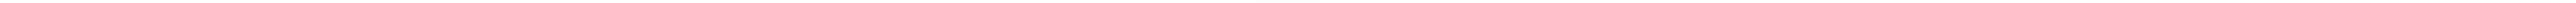

In [8]:
cm_join._ddf.visualize()

In [15]:
cm_join.compute()

,ps1_objid_left,ra_left,dec_left,ps1_gMeanPSFMag_left,ps1_rMeanPSFMag_left,ps1_iMeanPSFMag_left,nobs_g_left,nobs_r_left,nobs_i_left,mean_mag_g_left,...,catflags_sources,fieldID_sources,mag_sources,magerr_sources,mjd_sources,rcID_sources,band_sources,Norder_sources,Dir_sources,Npix_sources
9745676850465603584,71180673097035613,67.309784,-30.678856,-999.0000,20.332701,20.5077,0,1,0,NaN,...,0,1248,20.618536,0.186703,59205.25167,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.946716,0.019332,59181.31983,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.844381,0.019082,59181.31936,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.937126,0.019307,59153.36665,4,r,3,0,540
9745677245711646720,71190672942652378,67.294304,-30.673319,16.3430,15.784000,15.7671,0,19,0,NaN,...,0,1248,15.899614,0.019212,59233.18631,4,r,3,0,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.989315,0.268267,59474.46454,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.717926,0.238937,59501.48519,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,20.730957,0.240345,59524.36351,1,r,6,30000,34815
9799832777066020864,84620675022297947,67.502203,-19.476937,21.2815,21.001200,20.9014,19,53,0,21.116718,...,0,303,21.094055,0.256249,59205.28543,1,g,6,30000,34815


In [23]:
cm_join._ddf.columns

Index(['ps1_objid_left', 'ra_left', 'dec_left', 'ps1_gMeanPSFMag_left',
       'ps1_rMeanPSFMag_left', 'ps1_iMeanPSFMag_left', 'nobs_g_left',
       'nobs_r_left', 'nobs_i_left', 'mean_mag_g_left', 'mean_mag_r_left',
       'mean_mag_i_left', 'Norder_left', 'Dir_left', 'Npix_left',
       'ps1_objid_right', 'ra_right', 'dec_right', 'ps1_gMeanPSFMag_right',
       'ps1_rMeanPSFMag_right', 'ps1_iMeanPSFMag_right', 'nobs_g_right',
       'nobs_r_right', 'nobs_i_right', 'mean_mag_g_right', 'mean_mag_r_right',
       'mean_mag_i_right', 'Norder_right', 'Dir_right', 'Npix_right', '_DIST',
       'primary_id', 'join_id', 'join_hipscat_index', 'index_sources',
       'ps1_objid_sources', 'ra_sources', 'dec_sources',
       'ps1_gMeanPSFMag_sources', 'ps1_rMeanPSFMag_sources',
       'ps1_iMeanPSFMag_sources', 'nobs_g_sources', 'nobs_r_sources',
       'nobs_i_sources', 'mean_mag_g_sources', 'mean_mag_r_sources',
       'mean_mag_i_sources', 'catflags_sources', 'fieldID_sources',
       'mag_so

In [1]:
from hipscat.pixel_tree import PixelAlignmentType, PixelAlignment


In [12]:
alignment = PixelAlignment.align_trees(
        left.hc_structure.pixel_tree,
        right.hc_structure.pixel_tree,
        alignment_type=PixelAlignmentType.LEFT
    )

In [13]:
left.hc_structure.pixel_tree.pixels

{-1: {-1: <hipscat.pixel_tree.pixel_node.PixelNode at 0x7fb222fa2e50>},
 0: {8: <hipscat.pixel_tree.pixel_node.PixelNode at 0x7fb222fa8d00>}}

In [14]:
right.hc_structure.pixel_tree.pixels[0][8].node_type

<PixelNodeType.INNER: 1>

In [6]:

from lsdb.core.dataframe.join_catalog_data import join_catalog_data, crossmatch_catalog_data

In [13]:
a = left.compute()

In [17]:
pixel = left.hc_structure.get_pixels().iloc[0]
pixel

Norder              0
Dir                 0
Npix                8
num_objects    982531
Name: 0, dtype: int64